In [1]:
import sympy as sp

In [2]:
α, λ, Δt, u, v= sp.symbols("α λ Δt u v")

### Comparación del comportamiento del método de Euler y de Runge Kutta para problemas con solución periódica

Partimos de un problema de la forma
$$\frac{d^{2}}{dt^{2}}u=\ddot{u} = -\alpha^{2}u,$$
cuya solución analítica es
$$u(t) =  B*exp(i(\alpha t + C)),$$
donde $B$ y $C$ dependen del dato inicial (estamos asumiendo que $u y B$ pueden ser complejos, y que $\alpha>0$ y C son reales).

Podemos tambien reescribir esta solución como

$$u(t) = B*cos(\alpha t+C) + iB*sin(\alpha t + C)$$


Notemos que el valor absoluto de $u$ y $v$ se mantiene constante a lo largo del tiempo para la solución exacta. Esto será importante más adelante.

Para convertir el problema original en una ODE, definimos una nueva variable $v = \dot{u}$, y obtenemos un sistema de la forma


$$\begin{pmatrix}
    \dot{u} \\ \dot{v}
\end{pmatrix} = 
\begin{pmatrix}
    0 & 1 \\ -\alpha ^{2} & 0
\end{pmatrix}
\begin{pmatrix}
    u \\ v
\end{pmatrix} $$



A partir de ahora definiremos 


$$
U =
\begin{pmatrix}
    u \\ v
\end{pmatrix} , \quad A = 
\begin{pmatrix}
0 & 1 \\ -\alpha ^{2} & 0
\end{pmatrix} $$



### Método de Euler

Si tratamos de resolver este sistema usando el método de Euler, obtendremos
$$U^{n+1} = U^{n} + dt*AU^{n} = (I+dt*A)U^{n} = (I+dt*A)^{n}U^{0}$$

Calculamos los auvoalores de la matriz $(I+dt*A)$

In [3]:
Euler = sp.Matrix([[1, Δt],[-Δt*α**2, 1]])
Euler

Matrix([
[       1, Δt],
[-Δt*α**2,  1]])

In [4]:
eigvecs = Euler.eigenvects()
λ1, e1 = eigvecs[0][0], eigvecs[0][2][0]
λ2, e2 = eigvecs[1][0], eigvecs[1][2][0]

In [5]:
e1

Matrix([
[I/α],
[  1]])

In [6]:
e2

Matrix([
[-I/α],
[   1]])

In [7]:
λ1

-I*Δt*α + 1

In [8]:
λ2

I*Δt*α + 1

Como podemos ver, ambos autovalores tienen módulo mayor que 1. Eso quiere decir que si tenemos un dato inicial $U^{0}$ y lo expresamos en componentes en una base de autovectores de $(I+dt*A)$, al evolucionar el sistema estas componentes van a crecer en módulo siempre. 

Por ejemplo, supongamos que nuestro dato inicial es

$$u^{0} = 1, v^{0} = 0.$$
La solución exacta al problema es ahora $u(t) = cos(\alpha t)$

Descomponiendo el vector $U$ en la base de autovectores de $(I+dt*A)$ tenemos 
$$U^{0} = i\alpha*(e_{2}-e_{1})/2,$$

y por lo tanto, $$U^{n} = (I+dt*A)^{n} = i\alpha*(\lambda_{2}^{n}e_{2}-\lambda_{1}^{n}e_{1})/2$$

Como los autovalores tienen módulo mayor que 1, vemos que ambas componentes crecerán indefinidamente en módulo, en contraste con la solución exacta que se mantiene acotada. 


Text(0, 0.5, 'u')

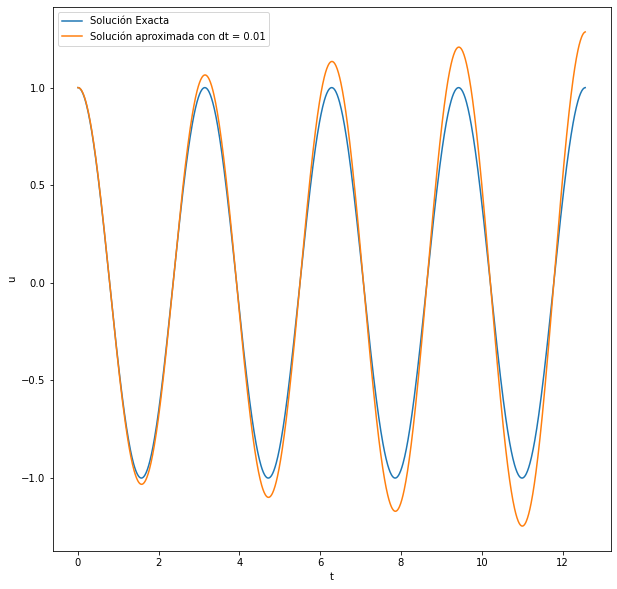

In [38]:
#Método de Euler:
import numpy as np
import matplotlib.pyplot as plt

U = np.array([1,0])  #dato inicial

#Definimos f, que sería nuestra matriz A
def f(U, alpha = 2):
    return (np.array([U[1], -alpha**2*U[0]]))

def Eulerstep(U, f, dt):
    return U + dt*f(U)


dt = 0.01
T = np.arange(0, 4*np.pi,dt)

solexacta = np.cos(2*T)

solEuler = []

for t in T:
    solEuler.append(U[0])
    U = Eulerstep(U, f, dt)
    
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(T, solexacta, label = "Solución Exacta")
ax.plot(T, solEuler, label = f"Solución aproximada con dt = {dt:.2f}")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("u")

### Método de Runge Kutta de orden 4

Construyamos la matriz para RK4
Definiendo un problema de valor inicial como:

\begin{equation} 
y'=f(x,y),\quad y(x_{0})=y_{0}
\end{equation}
Entonces el método RK4 para este problema está dado por la siguiente ecuación:

\begin{equation}
  y_{i+1}=y_{i}+\frac{1}{6}h\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right)
  \end{equation}
Donde

\begin{align}
k_{1}&=f\left(x_{i},y_{i}\right)\\k_{2}&=f\left(x_{i}+\frac{1}{2}h,y_{i}+\frac{1}{2}k_{1}h\right)\\k_{3}&=f\left(x_{i}+\frac{1}{2}h,y_{i}+\frac{1}{2}k_{2}h\right)\\k_{4}&=f\left( x_{i}+h,y_{i}+k_{3}h \right)\\
\end{align}

En nuestro caso tenemos $\dot{U} = AU$.
Esto quiere decir que

\begin{align}
k_{1}(U) = &AU&\\
k_{2}(U) = &A(U + \frac{dt}{2}k_1) &= (A + \frac{dt}{2}A^{2}) U\\
k_{3}(U) = &A(U + \frac{dt}{2}k_2) &= (A + \frac{dt}{2}A^{2} + \frac{dt^{2}}{4}A^{3})U\\
k_{4}(U) = &A(U + dtk_{3}) &= (A + dtA^{2} + \frac{dt^{2}}{2}A^{3} + \frac{dt^{3}}{4}A^{4})U
\end{align}

In [50]:
#Calculamos la matriz de runge kutta

Identity = sp.Matrix([[1, 0],[0, 1]])
A = sp.Matrix([[0, 1],[-α**2, 0]])  #esto vendría a ser nuestro f
k1 = A
k2 = A * (Identity + 0.5*Δt*k1)
k3 = A * (Identity + 0.5*Δt*k2)
k4 = A * (Identity + Δt*k3)

In [51]:
stepmatrix = Identity + (1/6)*Δt*(k1+2*k2+2*k3+k4)
sp.simplify(stepmatrix)

Matrix([
[0.0416666666666667*Δt**4*α**4 - 0.5*Δt**2*α**2 + 1.0,             Δt*(-0.166666666666667*Δt**2*α**2 + 1.0)],
[        Δt*α**2*(0.166666666666667*Δt**2*α**2 - 1.0), 0.0416666666666667*Δt**4*α**4 - 0.5*Δt**2*α**2 + 1.0]])

In [52]:
#Calculamos los autovalores
eigenvals = list(stepmatrix.eigenvals().keys())

A continuación podemos ver los autovalores del método de Runge Kutta.

In [54]:
eigenvals[0]

Δt**4*α**4/24 - Δt**2*α**2/2 - I*Δt*α*(Δt**2*α**2 - 6)/6 + 1

In [55]:
eigenvals[1]

Δt**4*α**4/24 - Δt**2*α**2/2 + I*Δt*α*(Δt**2*α**2 - 6)/6 + 1

Si calculamos el valor absoluto al cuadrado de estos autovalres tenemos

In [59]:
sp.simplify(eigenvals[0]*eigenvals[1])

Δt**8*α**8/576 - Δt**6*α**6/72 + 1

Claramente, si $\Delta t$ es lo suficientemente chico, la solución se mantendrá acotada y el método es estable.

Text(0, 0.5, 'u')

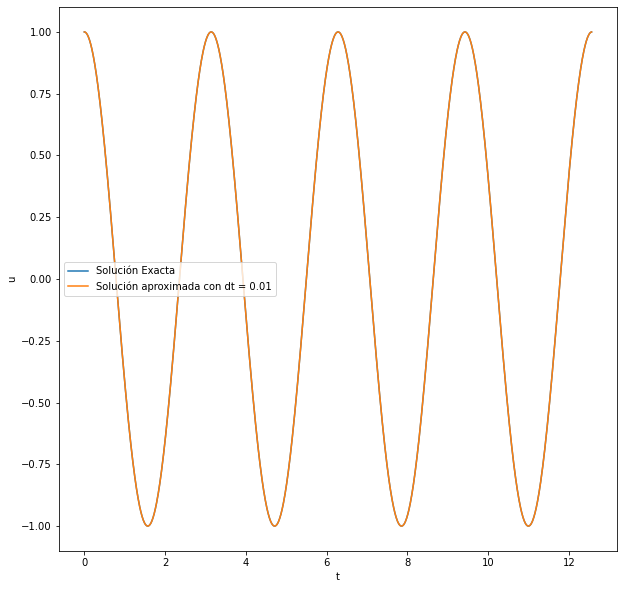

In [71]:
#Método de Euler:
import numpy as np
import matplotlib.pyplot as plt

U = np.array([1,0])  #dato inicial

#Definimos f, que sería nuestra matriz A
def f(U, alpha = 2):
    return (np.array([U[1], -alpha**2*U[0]]))

def RK4step(U, f, dt):
    k1 = f(U)
    k2 = f(U+0.5*dt*k1)
    k3 = f(U+0.5*dt*k2)
    k4 = f(U+dt*k3)
    
    return U + (dt/6.)*(k1+2.*k2+2.*k3+k4)


dt = 0.01
T = np.arange(0, 4*np.pi,dt)

solexacta = np.cos(2*T)

solRK4u = []
solRK4v = []

for t in T:
    solRK4u.append(U[0])
    solRK4v.append(U[1])
    U = RK4step(U, f, dt)
solRK4u = np.array(solRK4u)
solRK4v = np.array(solRK4v)
    
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(T, solexacta, label = "Solución Exacta")
ax.plot(T, solRK4u, label = f"Solución aproximada con dt = {dt:.2f}")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("u")

(0.999999998, 1.000000001)

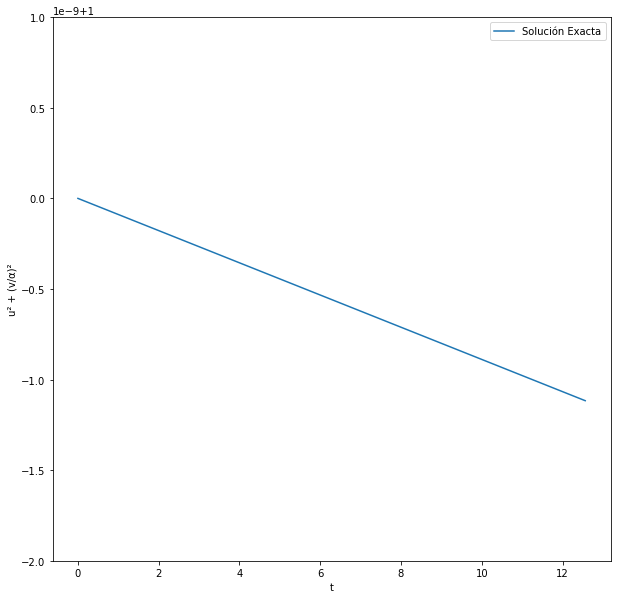

In [76]:
#Si calculamos u² + (v/α)² esto debiera darnos 1 siempre en el caso exacto. Hagámoslo para runge kutta

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(T, solRK4u**2+solRK4v**2/4, label = "Solución Exacta")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("u² + (v/α)²")
ax.set_ylim(1-2e-9, 1+1e-9)

In [ ]:
#Obsevamos que se mantiene cerca de 1 pero decae constantemente. Esto tiene sentido pues los autovalores
#de la matriz tienen módulo menor que 1